<a href="https://colab.research.google.com/github/halid-ux/FCSE/blob/master/Seminarska%20_VNP_Halid_Veaposki_186120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Seminary work

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
!pip install tsfresh sktime

In [76]:
!pip install --upgrade polars

##First dataset

In [77]:
import pandas as pd
import tsfresh
from tsfresh import extract_features
import plotly.express as px
import plotly.graph_objects as go
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.base import ForecastingHorizon
import numpy as np

In [78]:
df = pd.read_csv('/content/drive/MyDrive/oil and gas.csv')
df

,Symbol,Date,Open,High,Low,Close,Volume,Currency
0,Brent Oil,2000-01-04,23.9000,24.7000,23.8900,24.3900,32509,USD
1,Brent Oil,2000-01-05,24.2500,24.3700,23.7000,23.7300,30310,USD
2,Brent Oil,2000-01-06,23.5500,24.2200,23.3500,23.6200,44662,USD
3,Brent Oil,2000-01-07,23.5700,23.9800,23.0500,23.0900,34826,USD
4,Brent Oil,2000-01-10,23.0400,23.7800,23.0400,23.7300,26388,USD
...,...,...,...,...,...,...,...,...
23019,Heating Oil,2022-06-13,4.3612,4.3762,4.1949,4.2834,46406,USD
23020,Heating Oil,2022-06-14,4.2749,4.4570,4.2488,4.3940,36652,USD
23021,Heating Oil,2022-06-15,4.3816,4.6070,4.3557,4.5470,36908,USD
23022,Heating Oil,2022-06-16,4.5320,4.5825,4.4124,4.5713,28269,USD


In [79]:
df.isnull().sum()

,0
Symbol,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Currency,0


In [80]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter for the last 4 years
recent_data = df[df['Date'] >= '2019-01-01']

# Group by 'Symbol' to get different time series
time_series_dict = {symbol: data for symbol, data in recent_data.groupby('Symbol')}

# Select five different time series
selected_time_series = {k: time_series_dict[k] for k in list(time_series_dict.keys())[:5]}

In [81]:
# Process each time series separately
for symbol, data in selected_time_series.items():
    # Extract features
    features = extract_features(data, column_id="Date", column_sort="Date", column_value="Close")

    print(f"Extracted features for {symbol}:")
    print(features.head())

Feature Extraction: 100%|██████████| 896/896 [01:01<00:00, 14.54it/s]


Extracted features for Brent Oil:
            Close__variance_larger_than_standard_deviation  \
2019-01-02                                             0.0   
2019-01-03                                             0.0   
2019-01-04                                             0.0   
2019-01-07                                             0.0   
2019-01-08                                             0.0   

            Close__has_duplicate_max  Close__has_duplicate_min  \
2019-01-02                       0.0                       0.0   
2019-01-03                       0.0                       0.0   
2019-01-04                       0.0                       0.0   
2019-01-07                       0.0                       0.0   
2019-01-08                       0.0                       0.0   

            Close__has_duplicate  Close__sum_values  Close__abs_energy  \
2019-01-02                   0.0              54.91          3015.1081   
2019-01-03                   0.0              55

Feature Extraction: 100%|██████████| 913/913 [00:34<00:00, 26.50it/s]


Extracted features for Crude Oil WTI:
            Close__variance_larger_than_standard_deviation  \
2019-01-01                                             0.0   
2019-01-02                                             0.0   
2019-01-03                                             0.0   
2019-01-04                                             0.0   
2019-01-07                                             0.0   

            Close__has_duplicate_max  Close__has_duplicate_min  \
2019-01-01                       0.0                       0.0   
2019-01-02                       0.0                       0.0   
2019-01-03                       0.0                       0.0   
2019-01-04                       0.0                       0.0   
2019-01-07                       0.0                       0.0   

            Close__has_duplicate  Close__sum_values  Close__abs_energy  \
2019-01-01                   0.0              45.89          2105.8921   
2019-01-02                   0.0            

Feature Extraction: 100%|██████████| 914/914 [00:35<00:00, 26.11it/s]


Extracted features for Heating Oil:
            Close__variance_larger_than_standard_deviation  \
2019-01-01                                             0.0   
2019-01-02                                             0.0   
2019-01-03                                             0.0   
2019-01-04                                             0.0   
2019-01-07                                             0.0   

            Close__has_duplicate_max  Close__has_duplicate_min  \
2019-01-01                       0.0                       0.0   
2019-01-02                       0.0                       0.0   
2019-01-03                       0.0                       0.0   
2019-01-04                       0.0                       0.0   
2019-01-07                       0.0                       0.0   

            Close__has_duplicate  Close__sum_values  Close__abs_energy  \
2019-01-01                   0.0             1.6856           2.841247   
2019-01-02                   0.0             1

Feature Extraction: 100%|██████████| 913/913 [00:35<00:00, 25.37it/s]


Extracted features for Natural Gas:
            Close__variance_larger_than_standard_deviation  \
2019-01-01                                             0.0   
2019-01-02                                             0.0   
2019-01-03                                             0.0   
2019-01-04                                             0.0   
2019-01-07                                             0.0   

            Close__has_duplicate_max  Close__has_duplicate_min  \
2019-01-01                       0.0                       0.0   
2019-01-02                       0.0                       0.0   
2019-01-03                       0.0                       0.0   
2019-01-04                       0.0                       0.0   
2019-01-07                       0.0                       0.0   

            Close__has_duplicate  Close__sum_values  Close__abs_energy  \
2019-01-01                   0.0              2.982           8.892324   
2019-01-02                   0.0              

In [82]:
for symbol, data in selected_time_series.items():
    fig = px.line(data, x='Date', y='Close', title=f'{symbol} Price Over Time')
    fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [83]:
output_notebook()

for symbol, data in selected_time_series.items():
    p = figure(title=f'{symbol} Price Over Time', x_axis_label='Date', y_axis_label='Close', x_axis_type='datetime')
    source = ColumnDataSource(data)
    p.line('Date', 'Close', source=source)
    show(p)

In [84]:
# Assuming 'selected_time_series' is a dictionary with the symbol as the key
# and the data as a pandas DataFrame containing a 'Date' and 'Close' columns

for symbol, data in selected_time_series.items():
    y = data.set_index('Date')['Close']

    # Ensure the Date index has a frequency and fill missing dates
    y = y.asfreq('D').fillna(method='ffill')

    # Split data into training and testing sets
    y_train, y_test = temporal_train_test_split(y, test_size=365)

    # Define forecasting horizon (same length as test set)
    fh = ForecastingHorizon(y_test.index, is_relative=False)

    # Initialize the model (Naive Forecaster as an example)
    forecaster = NaiveForecaster(strategy="drift")

    # Fit the model
    forecaster.fit(y_train)

    # Make predictions
    y_pred = forecaster.predict(fh)

    # Evaluate the model
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f'{symbol} - MAPE: {mape:.2f}')

    # Plot the results
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=y_train.index, y=y_train, mode='lines', name='Train'))
    fig.add_trace(go.Scatter(x=y_test.index, y=y_test, mode='lines', name='Test'))
    fig.add_trace(go.Scatter(x=y_pred.index, y=y_pred, mode='lines', name='Prediction', line=dict(color='green')))
    fig.update_layout(title=f'{symbol} Forecasting', xaxis_title='Date', yaxis_title='Close')
    fig.show()

Brent Oil - MAPE: 0.13


<ipython-input-84-d4a28aa90fc3>:8: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Crude Oil WTI - MAPE: 0.15


<ipython-input-84-d4a28aa90fc3>:8: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



<ipython-input-84-d4a28aa90fc3>:8: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Heating Oil - MAPE: 0.20


<ipython-input-84-d4a28aa90fc3>:8: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Natural Gas - MAPE: 0.32


##Second dataset

In [85]:
tesla_stock = pd.read_csv('/content/drive/MyDrive/Tesla.csv - Tesla.csv.csv')
tesla_stock

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [86]:
tesla_stock.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


In [87]:
# Convert the Date column to datetime format
tesla_stock['Date'] = pd.to_datetime(tesla_stock['Date'])

In [88]:
# Filter the data for the selected 4 years (2013-2017)
start_year = 2013
end_year = 2017
tesla_stock_filtered = tesla_stock[(tesla_stock['Date'].dt.year >= start_year) & (tesla_stock['Date'].dt.year <= end_year)]

In [89]:
tesla_stock_filtered

,Date,Open,High,Low,Close,Volume,Adj Close
632,2013-01-02,35.000000,35.450001,34.709999,35.360001,1194800,35.360001
633,2013-01-03,35.180000,35.450001,34.750000,34.770000,742000,34.770000
634,2013-01-04,34.799999,34.799999,33.919998,34.400002,674000,34.400002
635,2013-01-07,34.799999,34.799999,33.900002,34.340000,442000,34.340000
636,2013-01-08,34.500000,34.500000,33.110001,33.680000,1284000,33.680000
...,...,...,...,...,...,...,...
1687,2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [90]:
# Select a time series column for feature extraction, e.g., 'Close'
features_extracted = tsfresh.extract_features(tesla_stock_filtered[['Date', 'Close']], column_id='Date', column_sort='Date')

Feature Extraction: 100%|██████████| 1060/1060 [01:00<00:00, 17.59it/s]


In [91]:
fig = px.line(tesla_stock_filtered, x='Date', y='Close', title='Tesla Stock Close Price (2013-2017)')
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [92]:
output_notebook()

p = figure(title="Tesla Stock Close Price (2013-2017)", x_axis_label='Date', y_axis_label='Close', x_axis_type='datetime')
p.line(tesla_stock_filtered['Date'], tesla_stock_filtered['Close'], legend_label='Close Price', line_width=2)
show(p)

##Third dataset

In [93]:
coin_bitcoin = pd.read_csv('/content/drive/MyDrive/coin_Bitcoin.csv')
coin_bitcoin

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [94]:
coin_bitcoin.isnull().sum()

,0
SNo,0
Name,0
Symbol,0
Date,0
High,0
Low,0
Open,0
Close,0
Volume,0
Marketcap,0


In [95]:
# Convert the Date column to datetime format
coin_bitcoin['Date'] = pd.to_datetime(coin_bitcoin['Date'])

In [96]:
# Filter the data for the selected 4 years (2017-2021)
start_year = 2017
end_year = 2021
bitcoin_filtered = coin_bitcoin[(coin_bitcoin['Date'].dt.year >= start_year) & (coin_bitcoin['Date'].dt.year <= end_year)]

In [97]:
# Select a time series column for feature extraction, e.g., 'Close'
features_extracted = tsfresh.extract_features(bitcoin_filtered[['Date', 'Close']], column_id='Date', column_sort='Date')

Feature Extraction: 100%|██████████| 1648/1648 [01:16<00:00, 21.46it/s]


In [98]:
fig = px.line(bitcoin_filtered, x='Date', y='Close', title='Bitcoin Close Price (2017-2021)')
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [99]:
output_notebook()

p = figure(title="Bitcoin Close Price (2017-2021)", x_axis_label='Date', y_axis_label='Close', x_axis_type='datetime')
p.line(bitcoin_filtered['Date'], bitcoin_filtered['Close'], legend_label='Close Price', line_width=2)
show(p)

##Forth dataset

In [100]:
gold_price = pd.read_csv('/content/drive/MyDrive/annual_csv.csv')
gold_price

,Date,Price
0,1950-12,34.720
1,1951-12,34.660
2,1952-12,34.790
3,1953-12,34.850
4,1954-12,35.040
...,...,...
65,2015-12,1068.317
66,2016-12,1152.165
67,2017-12,1265.674
68,2018-12,1249.887


In [101]:
gold_price.isnull().sum()

,0
Date,0
Price,0


In [102]:
# Convert the Date column to datetime format
gold_price['Date'] = pd.to_datetime(gold_price['Date'])

In [103]:
# Filter the data for the last 4 years in the dataset (2016-2019)
start_year = 2015
end_year = 2019
gold_price_filtered = gold_price[(gold_price['Date'].dt.year >= start_year) & (gold_price['Date'].dt.year <= end_year)]

In [104]:
# Apply tsfresh for feature extraction
# Extract features from the 'Price' column, treating 'Date' as an identifier
features_extracted = tsfresh.extract_features(gold_price_filtered, column_id='Date')

Feature Extraction: 100%|██████████| 5/5 [00:00<00:00, 30.85it/s]


In [105]:
# Visualize the data using Plotly
fig = px.line(gold_price_filtered, x='Date', y='Price', title='Gold Price (2015-2019)')
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [106]:
# Visualize the data using Bokeh
output_notebook()

p = figure(title="Gold Price (2016-2019)", x_axis_label='Date', y_axis_label='Price', x_axis_type='datetime')
p.line(gold_price_filtered['Date'], gold_price_filtered['Price'], legend_label='Price', line_width=2)
show(p)

In [107]:
from sktime.forecasting.compose import make_reduction
from sklearn.ensemble import GradientBoostingRegressor

forecaster = make_reduction(GradientBoostingRegressor(), strategy="recursive")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)


In [108]:
from sktime.forecasting.fbprophet import Prophet

forecaster = Prophet()
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoot2sc4c/7dy68ukz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoot2sc4c/go8j9j0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29456', 'data', 'file=/tmp/tmpoot2sc4c/7dy68ukz.json', 'init=/tmp/tmpoot2sc4c/go8j9j0l.json', 'output', 'file=/tmp/tmpoot2sc4c/prophet_model16lzigpo/prophet_model-20240901212510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:25:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:25:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [109]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

#Exponential Smoothing
for symbol, data in selected_time_series.items():
    y = data.set_index('Date')['Close']
    y = y.asfreq('D').fillna(method='ffill')
    y_train, y_test = temporal_train_test_split(y, test_size=365)
    fh = ForecastingHorizon(y_test.index, is_relative=False)

    forecaster = ExponentialSmoothing(trend='add', seasonal='add', sp=12)
    forecaster.fit(y_train)
    y_pred = forecaster.predict(fh)

    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f'{symbol} - MAPE: {mape:.2f}')

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=y_train.index, y=y_train, mode='lines', name='Train'))
    fig.add_trace(go.Scatter(x=y_test.index, y=y_test, mode='lines', name='Test'))
    fig.add_trace(go.Scatter(x=y_pred.index, y=y_pred, mode='lines', name='Prediction', line=dict(color='green')))
    fig.update_layout(title=f'{symbol} Forecasting with Exponential Smoothing', xaxis_title='Date', yaxis_title='Close')
    fig.show()


<ipython-input-109-ff96b0c29bd1>:6: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Brent Oil - MAPE: 0.13


<ipython-input-109-ff96b0c29bd1>:6: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Crude Oil WTI - MAPE: 0.16


<ipython-input-109-ff96b0c29bd1>:6: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Heating Oil - MAPE: 0.11


<ipython-input-109-ff96b0c29bd1>:6: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Natural Gas - MAPE: 0.32


In [110]:
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import plotly.graph_objects as go

# Имплементација на ThetaForecaster за секој симбол
for symbol, data in selected_time_series.items():
    # Подготовка на податоците
    y = data.set_index('Date')['Close']
    y = y.asfreq('D').fillna(method='ffill')

    # Разделба на тренинг и тест сетови
    y_train, y_test = temporal_train_test_split(y, test_size=365)
    fh = ForecastingHorizon(y_test.index, is_relative=False)

    # Иницијализација и фитување на ThetaForecaster
    forecaster = ThetaForecaster(sp=12)  # sp=12 е сезонскиот период (на пример, месечни податоци)
    forecaster.fit(y_train)

    # Предвидување
    y_pred = forecaster.predict(fh)

    # Пресметка на MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f'{symbol} - MAPE: {mape:.2f}')

    # Визуелизација на резултатите
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=y_train.index, y=y_train, mode='lines', name='Train'))
    fig.add_trace(go.Scatter(x=y_test.index, y=y_test, mode='lines', name='Test'))
    fig.add_trace(go.Scatter(x=y_pred.index, y=y_pred, mode='lines', name='Prediction', line=dict(color='green')))
    fig.update_layout(title=f'{symbol} Forecasting with ThetaForecaster', xaxis_title='Date', yaxis_title='Close')
    fig.show()


Brent Oil - MAPE: 0.17


<ipython-input-110-5b687b5eb7ef>:11: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Crude Oil WTI - MAPE: 0.19


<ipython-input-110-5b687b5eb7ef>:11: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



<ipython-input-110-5b687b5eb7ef>:11: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Heating Oil - MAPE: 0.23


<ipython-input-110-5b687b5eb7ef>:11: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Natural Gas - MAPE: 0.32


In [111]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

# Речник за чување на MAPE вредностите за секој модел и симбол
mape_results = {}

for symbol, data in selected_time_series.items():
    y = data.set_index('Date')['Close']
    y = y.asfreq('D').fillna(method='ffill')
    y_train, y_test = temporal_train_test_split(y, test_size=365)
    fh = ForecastingHorizon(y_test.index, is_relative=False)

    # Список на модели за тестирање
    models = {
        'NaiveForecaster': NaiveForecaster(strategy="last"),
        'ExponentialSmoothing': ExponentialSmoothing(trend="add", seasonal="add", sp=12),
        'ThetaForecaster': ThetaForecaster(sp=12)
    }

    # Чување на MAPE за секој модел
    mape_results[symbol] = {}

    for model_name, model in models.items():
        model.fit(y_train)
        y_pred = model.predict(fh)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        mape_results[symbol][model_name] = mape

        print(f'{symbol} - {model_name} - MAPE: {mape:.2f}')


Brent Oil - NaiveForecaster - MAPE: 0.16


<ipython-input-111-26f9c175e701>:8: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Brent Oil - ExponentialSmoothing - MAPE: 0.13
Brent Oil - ThetaForecaster - MAPE: 0.17
Crude Oil WTI - NaiveForecaster - MAPE: 0.19


<ipython-input-111-26f9c175e701>:8: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Crude Oil WTI - ExponentialSmoothing - MAPE: 0.16
Crude Oil WTI - ThetaForecaster - MAPE: 0.19
Heating Oil - NaiveForecaster - MAPE: 0.22


<ipython-input-111-26f9c175e701>:8: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Heating Oil - ExponentialSmoothing - MAPE: 0.11
Heating Oil - ThetaForecaster - MAPE: 0.23
Natural Gas - NaiveForecaster - MAPE: 0.33


<ipython-input-111-26f9c175e701>:8: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Natural Gas - ExponentialSmoothing - MAPE: 0.32
Natural Gas - ThetaForecaster - MAPE: 0.32


In [112]:
import pandas as pd

# Конверзија на резултатите во DataFrame за лесна споредба
mape_df = pd.DataFrame(mape_results)
print(mape_df)


                      Brent Oil  Crude Oil WTI  Heating Oil  Natural Gas
NaiveForecaster        0.162289       0.192790     0.219330     0.326387
ExponentialSmoothing   0.133398       0.155293     0.114451     0.315372
ThetaForecaster        0.171470       0.191484     0.234081     0.323449


In [113]:
from pmdarima import auto_arima

model = auto_arima(y_train, seasonal=True, m=12)
y_pred = model.predict(n_periods=len(y_test))


In [114]:
!pip install prophet


<ipython-input-115-5317a58416aa>:18: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoot2sc4c/4oqpyt93.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoot2sc4c/omspbav2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56989', 'data', 'file=/tmp/tmpoot2sc4c/4oqpyt93.json', 'init=/tmp/tmpoot2sc4c/omspbav2.json', 'output', 'file=/tmp/tmpoot2sc4c/prophet_modelyvkhr85j/prophet_model-20240901212533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:25:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:25:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdsta

Prophet - MAPE: 0.09
Pyramid ARIMA - MAPE: 0.16
ThetaForecaster (sktime) - MAPE: 0.17
ExponentialSmoothing (sktime) - MAPE: 0.13


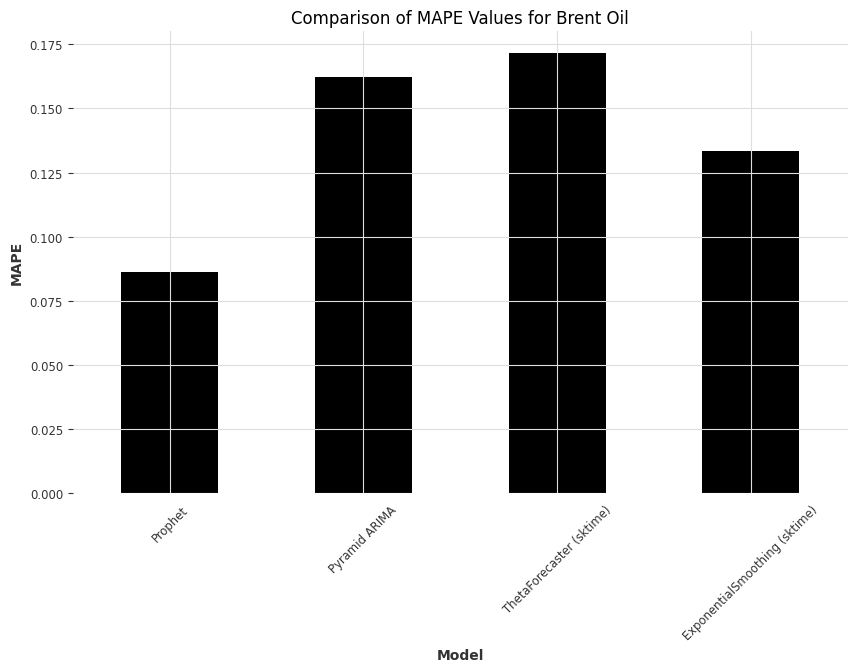

In [115]:
from prophet import Prophet
from pmdarima import auto_arima
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import pandas as pd
import matplotlib.pyplot as plt

# Резултати од споредба
comparison_results = {}

# Пример за една временска серија - можеш да го направиш ова за сите серии во петла
symbol = 'Brent Oil'  # Примерно симбол
data = selected_time_series[symbol]
y = data.set_index('Date')['Close']
y = y.asfreq('D').fillna(method='ffill')

# Разделба на тренинг и тест сетови
y_train, y_test = temporal_train_test_split(y, test_size=365)
fh = ForecastingHorizon(y_test.index, is_relative=False)

# 1. Prophet
y_train_prophet = y_train.reset_index().rename(columns={"Date": "ds", "Close": "y"})
prophet_model = Prophet()
prophet_model.fit(y_train_prophet)
prophet_forecast = prophet_model.predict(y_test.reset_index().rename(columns={"Date": "ds"}))
prophet_forecast = prophet_forecast.set_index('ds')['yhat']
prophet_mape = mean_absolute_percentage_error(y_test, prophet_forecast)
comparison_results['Prophet'] = prophet_mape

# 2. Pyramid ARIMA
arima_model = auto_arima(y_train, seasonal=True, m=12)
arima_forecast = arima_model.predict(n_periods=len(y_test))
arima_forecast = pd.Series(arima_forecast, index=y_test.index)
arima_mape = mean_absolute_percentage_error(y_test, arima_forecast)
comparison_results['Pyramid ARIMA'] = arima_mape

# 3. ThetaForecaster (sktime)
theta_model = ThetaForecaster(sp=12)
theta_model.fit(y_train)
theta_forecast = theta_model.predict(fh)
theta_mape = mean_absolute_percentage_error(y_test, theta_forecast)
comparison_results['ThetaForecaster (sktime)'] = theta_mape

# 4. ExponentialSmoothing (sktime)
exp_model = ExponentialSmoothing(trend='add', seasonal='add', sp=12)
exp_model.fit(y_train)
exp_forecast = exp_model.predict(fh)
exp_mape = mean_absolute_percentage_error(y_test, exp_forecast)
comparison_results['ExponentialSmoothing (sktime)'] = exp_mape

# Прикажување на резултатите
for model_name, mape_value in comparison_results.items():
    print(f'{model_name} - MAPE: {mape_value:.2f}')

# Визуелизација на MAPE вредностите
comparison_df = pd.DataFrame(list(comparison_results.items()), columns=['Model', 'MAPE'])
comparison_df.set_index('Model', inplace=True)

comparison_df.plot(kind='bar', legend=False, figsize=(10, 6))
plt.title(f'Comparison of MAPE Values for {symbol}')
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.xticks(rotation=45)
plt.show()


<ipython-input-116-059ea7f81d21>:22: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoot2sc4c/kzkkpowq.json


Processing Brent Oil...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoot2sc4c/yr9xpt7_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9019', 'data', 'file=/tmp/tmpoot2sc4c/kzkkpowq.json', 'init=/tmp/tmpoot2sc4c/yr9xpt7_.json', 'output', 'file=/tmp/tmpoot2sc4c/prophet_modeldif_40_u/prophet_model-20240901212613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:26:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:26:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-116-059ea7f81d21>:22: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /t

Processing Crude Oil WTI...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoot2sc4c/gu5un2we.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86337', 'data', 'file=/tmp/tmpoot2sc4c/gu2ir1wa.json', 'init=/tmp/tmpoot2sc4c/gu5un2we.json', 'output', 'file=/tmp/tmpoot2sc4c/prophet_modelxyp3wbza/prophet_model-20240901212651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:26:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:26:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-116-059ea7f81d21>:22: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /

Processing Heating Oil...


21:27:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-116-059ea7f81d21>:22: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoot2sc4c/x60q7f82.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoot2sc4c/3kj97mnx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34165', 'data', 'file=/tmp/tmpoot2sc4c/x60q7f82.json', 'init=/tmp/tmpoot2sc4c/3kj97mnx.json', 'output', 'file=/tmp/tmpoot2sc4c/prophet_model9ab2knki/prophet_model-20240901212811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:28:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstan

Processing Natural Gas...


21:28:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


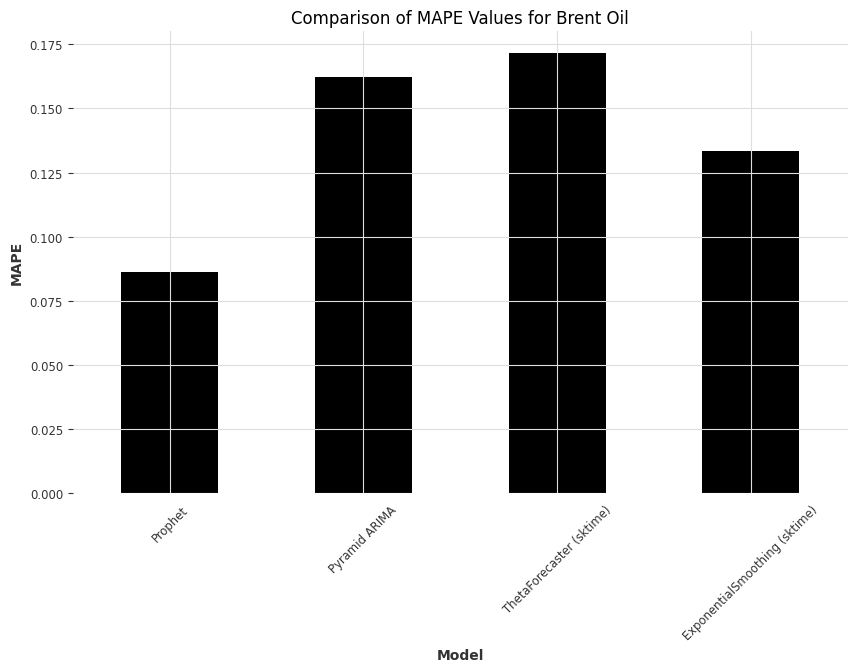

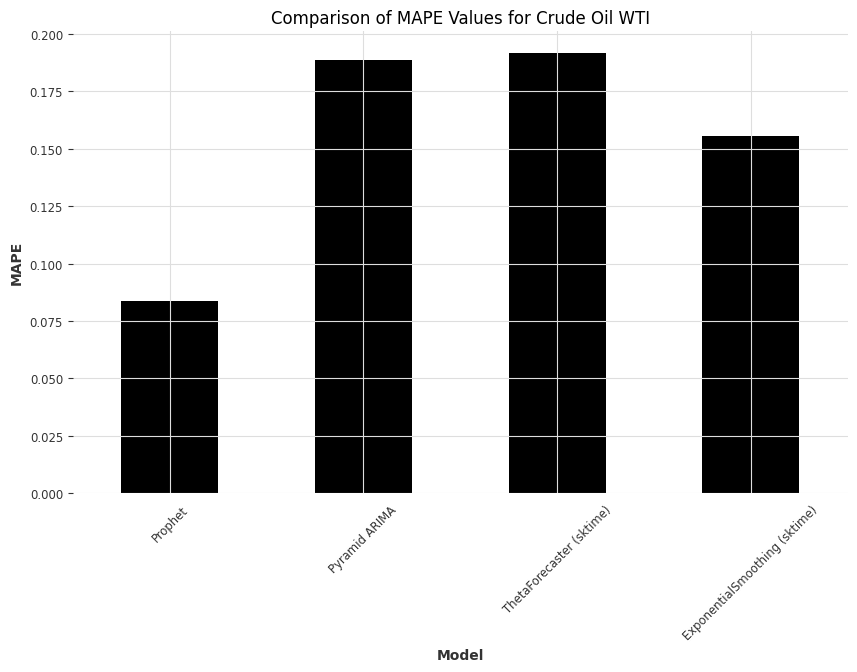

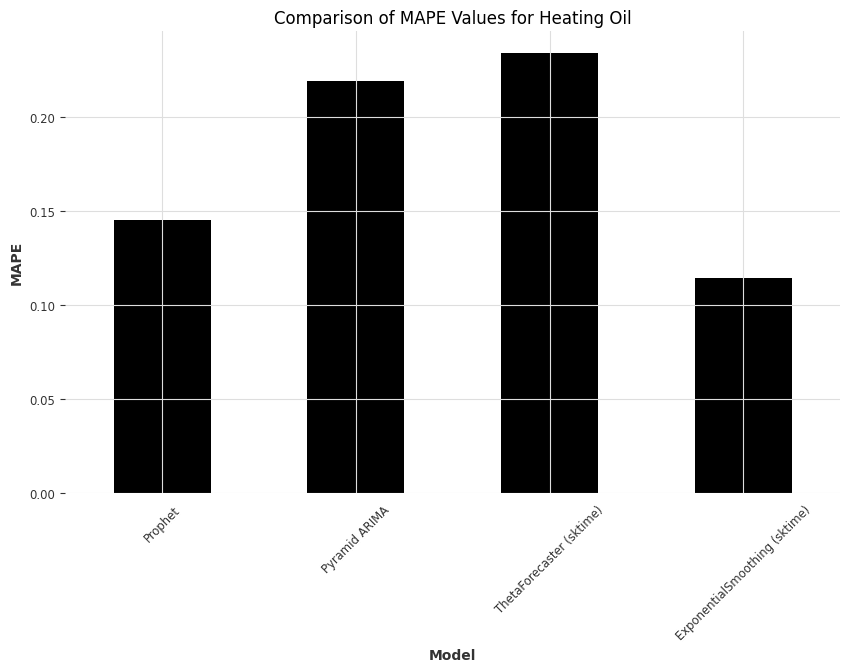

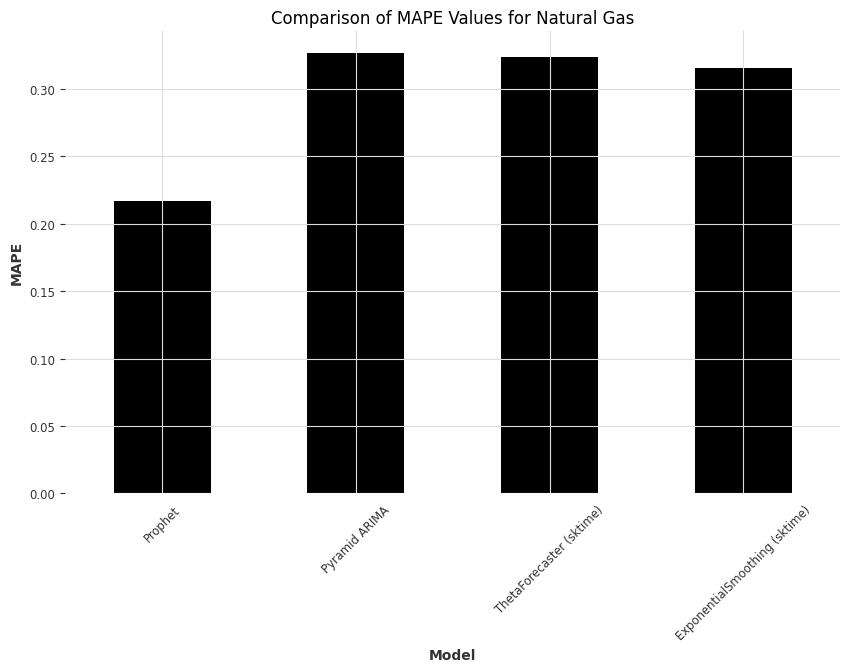

In [116]:
from prophet import Prophet
from pmdarima import auto_arima
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import pandas as pd
import matplotlib.pyplot as plt

# Резултати од споредба за сите временски серии
comparison_results_all = {}

# Пет различни временски серии
selected_time_series = {k: time_series_dict[k] for k in list(time_series_dict.keys())[:5]}

for symbol, data in selected_time_series.items():
    print(f"Processing {symbol}...")

    # Подготви ги податоците
    y = data.set_index('Date')['Close']
    y = y.asfreq('D').fillna(method='ffill')

    # Разделба на тренинг и тест сетови
    y_train, y_test = temporal_train_test_split(y, test_size=365)
    fh = ForecastingHorizon(y_test.index, is_relative=False)

    # Резултати од споредба за една временска серија
    comparison_results = {}

    # 1. Prophet
    y_train_prophet = y_train.reset_index().rename(columns={"Date": "ds", "Close": "y"})
    prophet_model = Prophet()
    prophet_model.fit(y_train_prophet)
    prophet_forecast = prophet_model.predict(y_test.reset_index().rename(columns={"Date": "ds"}))
    prophet_forecast = prophet_forecast.set_index('ds')['yhat']
    prophet_mape = mean_absolute_percentage_error(y_test, prophet_forecast)
    comparison_results['Prophet'] = prophet_mape

    # 2. Pyramid ARIMA
    arima_model = auto_arima(y_train, seasonal=True, m=12)
    arima_forecast = arima_model.predict(n_periods=len(y_test))
    arima_forecast = pd.Series(arima_forecast, index=y_test.index)
    arima_mape = mean_absolute_percentage_error(y_test, arima_forecast)
    comparison_results['Pyramid ARIMA'] = arima_mape

    # 3. ThetaForecaster (sktime)
    theta_model = ThetaForecaster(sp=12)
    theta_model.fit(y_train)
    theta_forecast = theta_model.predict(fh)
    theta_mape = mean_absolute_percentage_error(y_test, theta_forecast)
    comparison_results['ThetaForecaster (sktime)'] = theta_mape

    # 4. ExponentialSmoothing (sktime)
    exp_model = ExponentialSmoothing(trend='add', seasonal='add', sp=12)
    exp_model.fit(y_train)
    exp_forecast = exp_model.predict(fh)
    exp_mape = mean_absolute_percentage_error(y_test, exp_forecast)
    comparison_results['ExponentialSmoothing (sktime)'] = exp_mape

    # Додавање на резултатите во главниот речник
    comparison_results_all[symbol] = comparison_results

# Визуелизација на резултатите за секоја временска серија
for symbol, results in comparison_results_all.items():
    comparison_df = pd.DataFrame(list(results.items()), columns=['Model', 'MAPE'])
    comparison_df.set_index('Model', inplace=True)

    comparison_df.plot(kind='bar', legend=False, figsize=(10, 6))
    plt.title(f'Comparison of MAPE Values for {symbol}')
    plt.xlabel('Model')
    plt.ylabel('MAPE')
    plt.xticks(rotation=45)
    plt.show()
